**Итоговая работа по курсу «Feature engineering и предобработка данных»**

    1) Загрузить файл data_breast.csv. В данном файле собрана расчетная информация с обработанных изображений биоптата молочных желез женщин. Задача заключается в предсказании переменной “Diagnosis” - является ли содержимое биоптата доброкачественным (значение “B” – benign) либо злокачественным (значение “M” –malicious). Описание данных доступно на сайте

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline



In [2]:
data_breast=pd.read_csv('data_breast.csv') 
data_breast.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

посмотрим в процентном соотношении кого больше

In [4]:
round(data_breast.diagnosis.value_counts(normalize=True) *100,1)

B    62.7
M    37.3
Name: diagnosis, dtype: float64

2) Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [5]:
data_breast.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

3) Выбрать стратегию для работы с пропущенными значениями.

In [6]:
data_breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

к счастью, тут весьма чистенький датасет, и пропущенных значений в нём нет, но если бы были, то можно было заменить медианным значением

4) Рассчитать и визуализировать корреляционную матрицу для переменных.

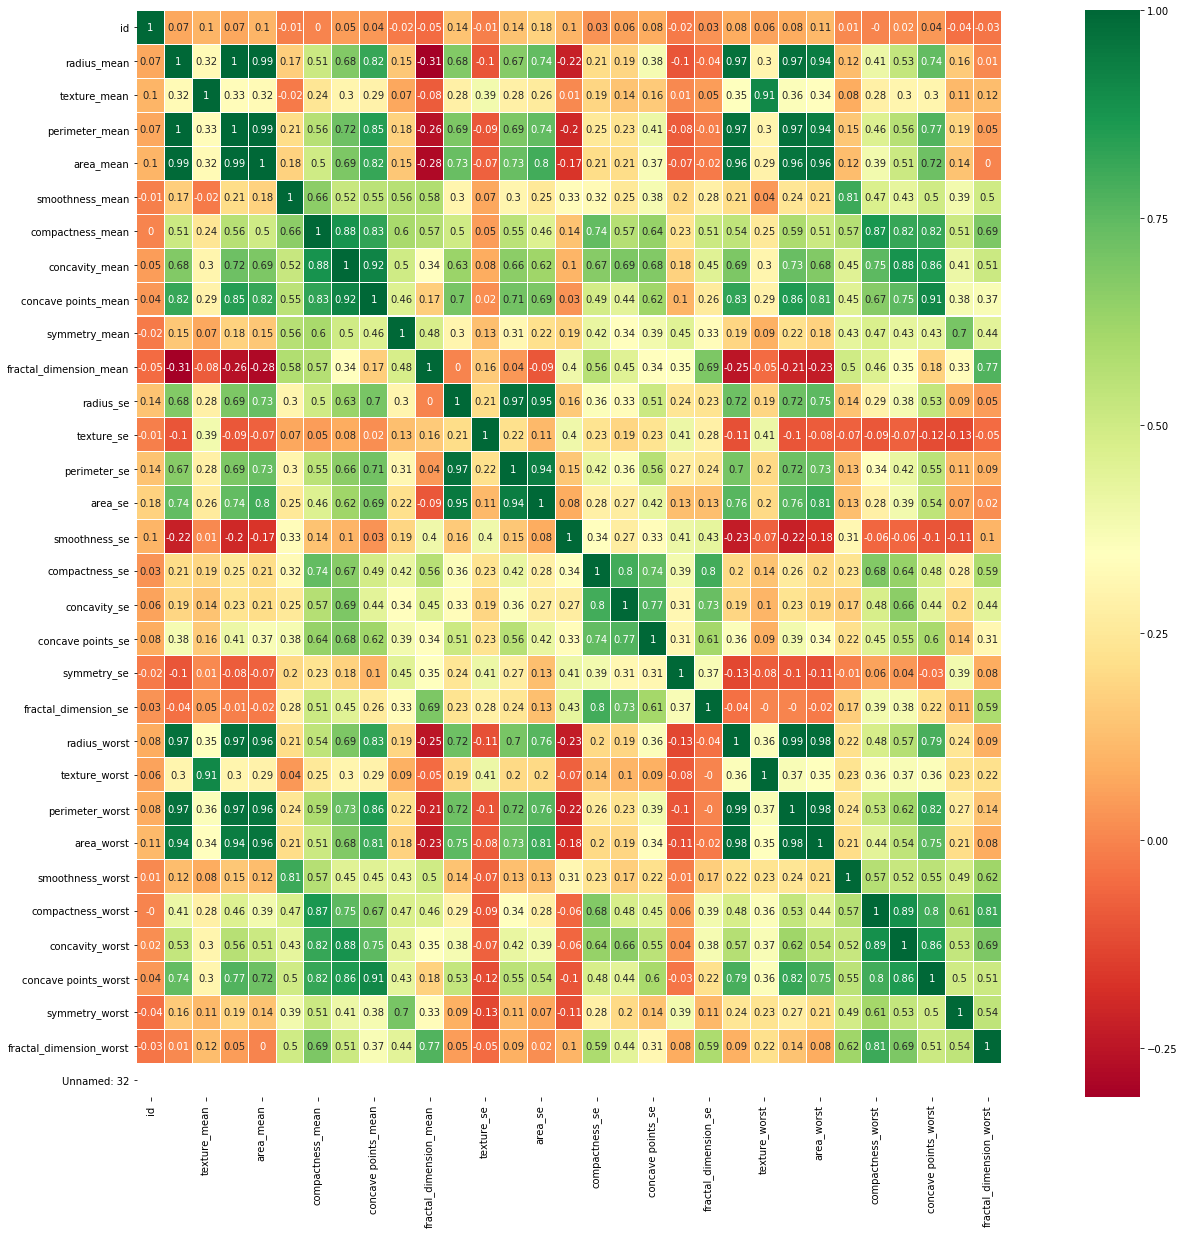

In [7]:
correlation_matrix = data_breast.corr(method ='pearson').round(2).T
# annot = True чтобы печатать значение внутри ячейки матрицы
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',linewidths=0.01, annot=True,yticklabels=True)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

перед построением модели нужно удалить сильно корреллирующие между собой параметры, оставив только один из них. Т.к Линейная регрессия категорически не любит, когда параметры между собой коррелируют

In [8]:
# создаем матрицу корреляций
corr_matrix = data_breast.corr().abs()

# Выбираем верхний треугольник матрицы
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Ищем индексы колонок с корреляцией большей чем 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [9]:
data_breast = data_breast.drop(data_breast[to_drop], axis=1) # удаляем столбцы которые сильно коррелируют между собой
data_breast.head()

id diagnosis  radius_mean  texture_mean  smoothness_mean  \
0    842302         M        17.99         10.38          0.11840   
1    842517         M        20.57         17.77          0.08474   
2  84300903         M        19.69         21.25          0.10960   
3  84348301         M        11.42         20.38          0.14250   
4  84358402         M        20.29         14.34          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  symmetry_se  fractal_dimension_se  \
0                 0.07871  ...      0.03003              0.006193   
1                 0.05667  ...      0.01389              0.003532   
2                 0.05999  ...      0.02250              0.004571   
3                 0.09744  ...      0.05963              0.009208   
4                 0.05883  ...      0.01756              0.005115   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0          17.33            0.1622             0.6656           0.7119   
1          23.41            0.1238             0.1866           0.2416   
2          25.53            0.1444             0.4245           0.4504   
3          26.50            0.2098             0.8663           0.6869   
4          16.67            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32  
0                0.2654          0.4601                  0.11890          NaN  
1                0.1860          0.2750                  0.08902          NaN  
2                0.2430          0.3613                  0.08758          NaN  
3                0.2575          0.6638                  0.17300          NaN  
4                0.1625          0.2364                  0.07678          NaN  

[5 rows x 26 columns]

In [10]:
data_breast.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) # удаляем нечисловые столбцы, иначе ничего не построится

5) Визуализировать взаимосвязи между переменными (scatter plots, гистограммы, …).

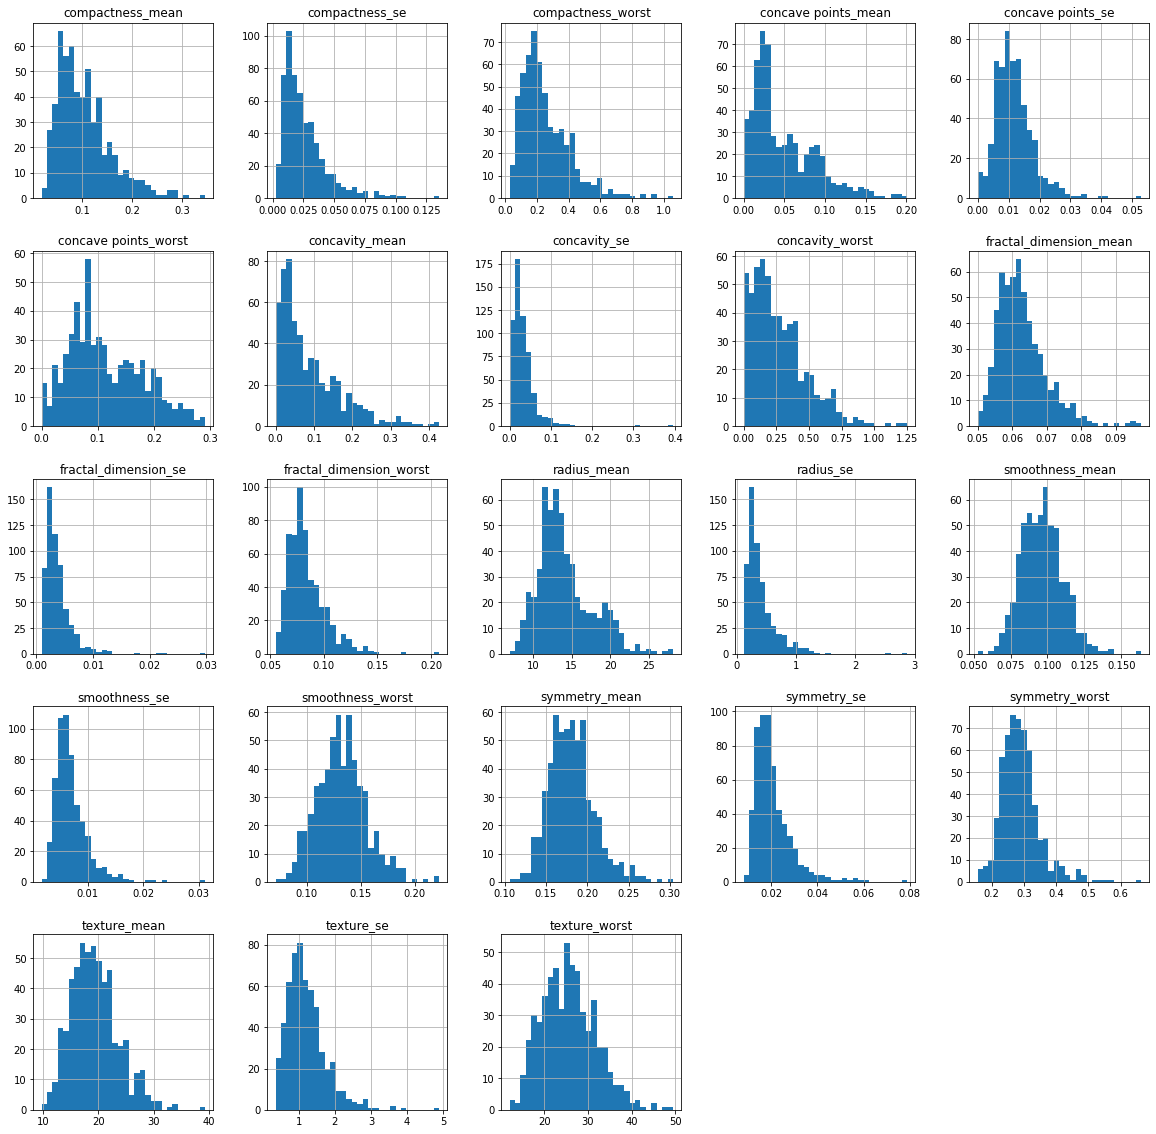

In [11]:
data_breast.hist(figsize=(20,20), bins = 30)
plt.show()

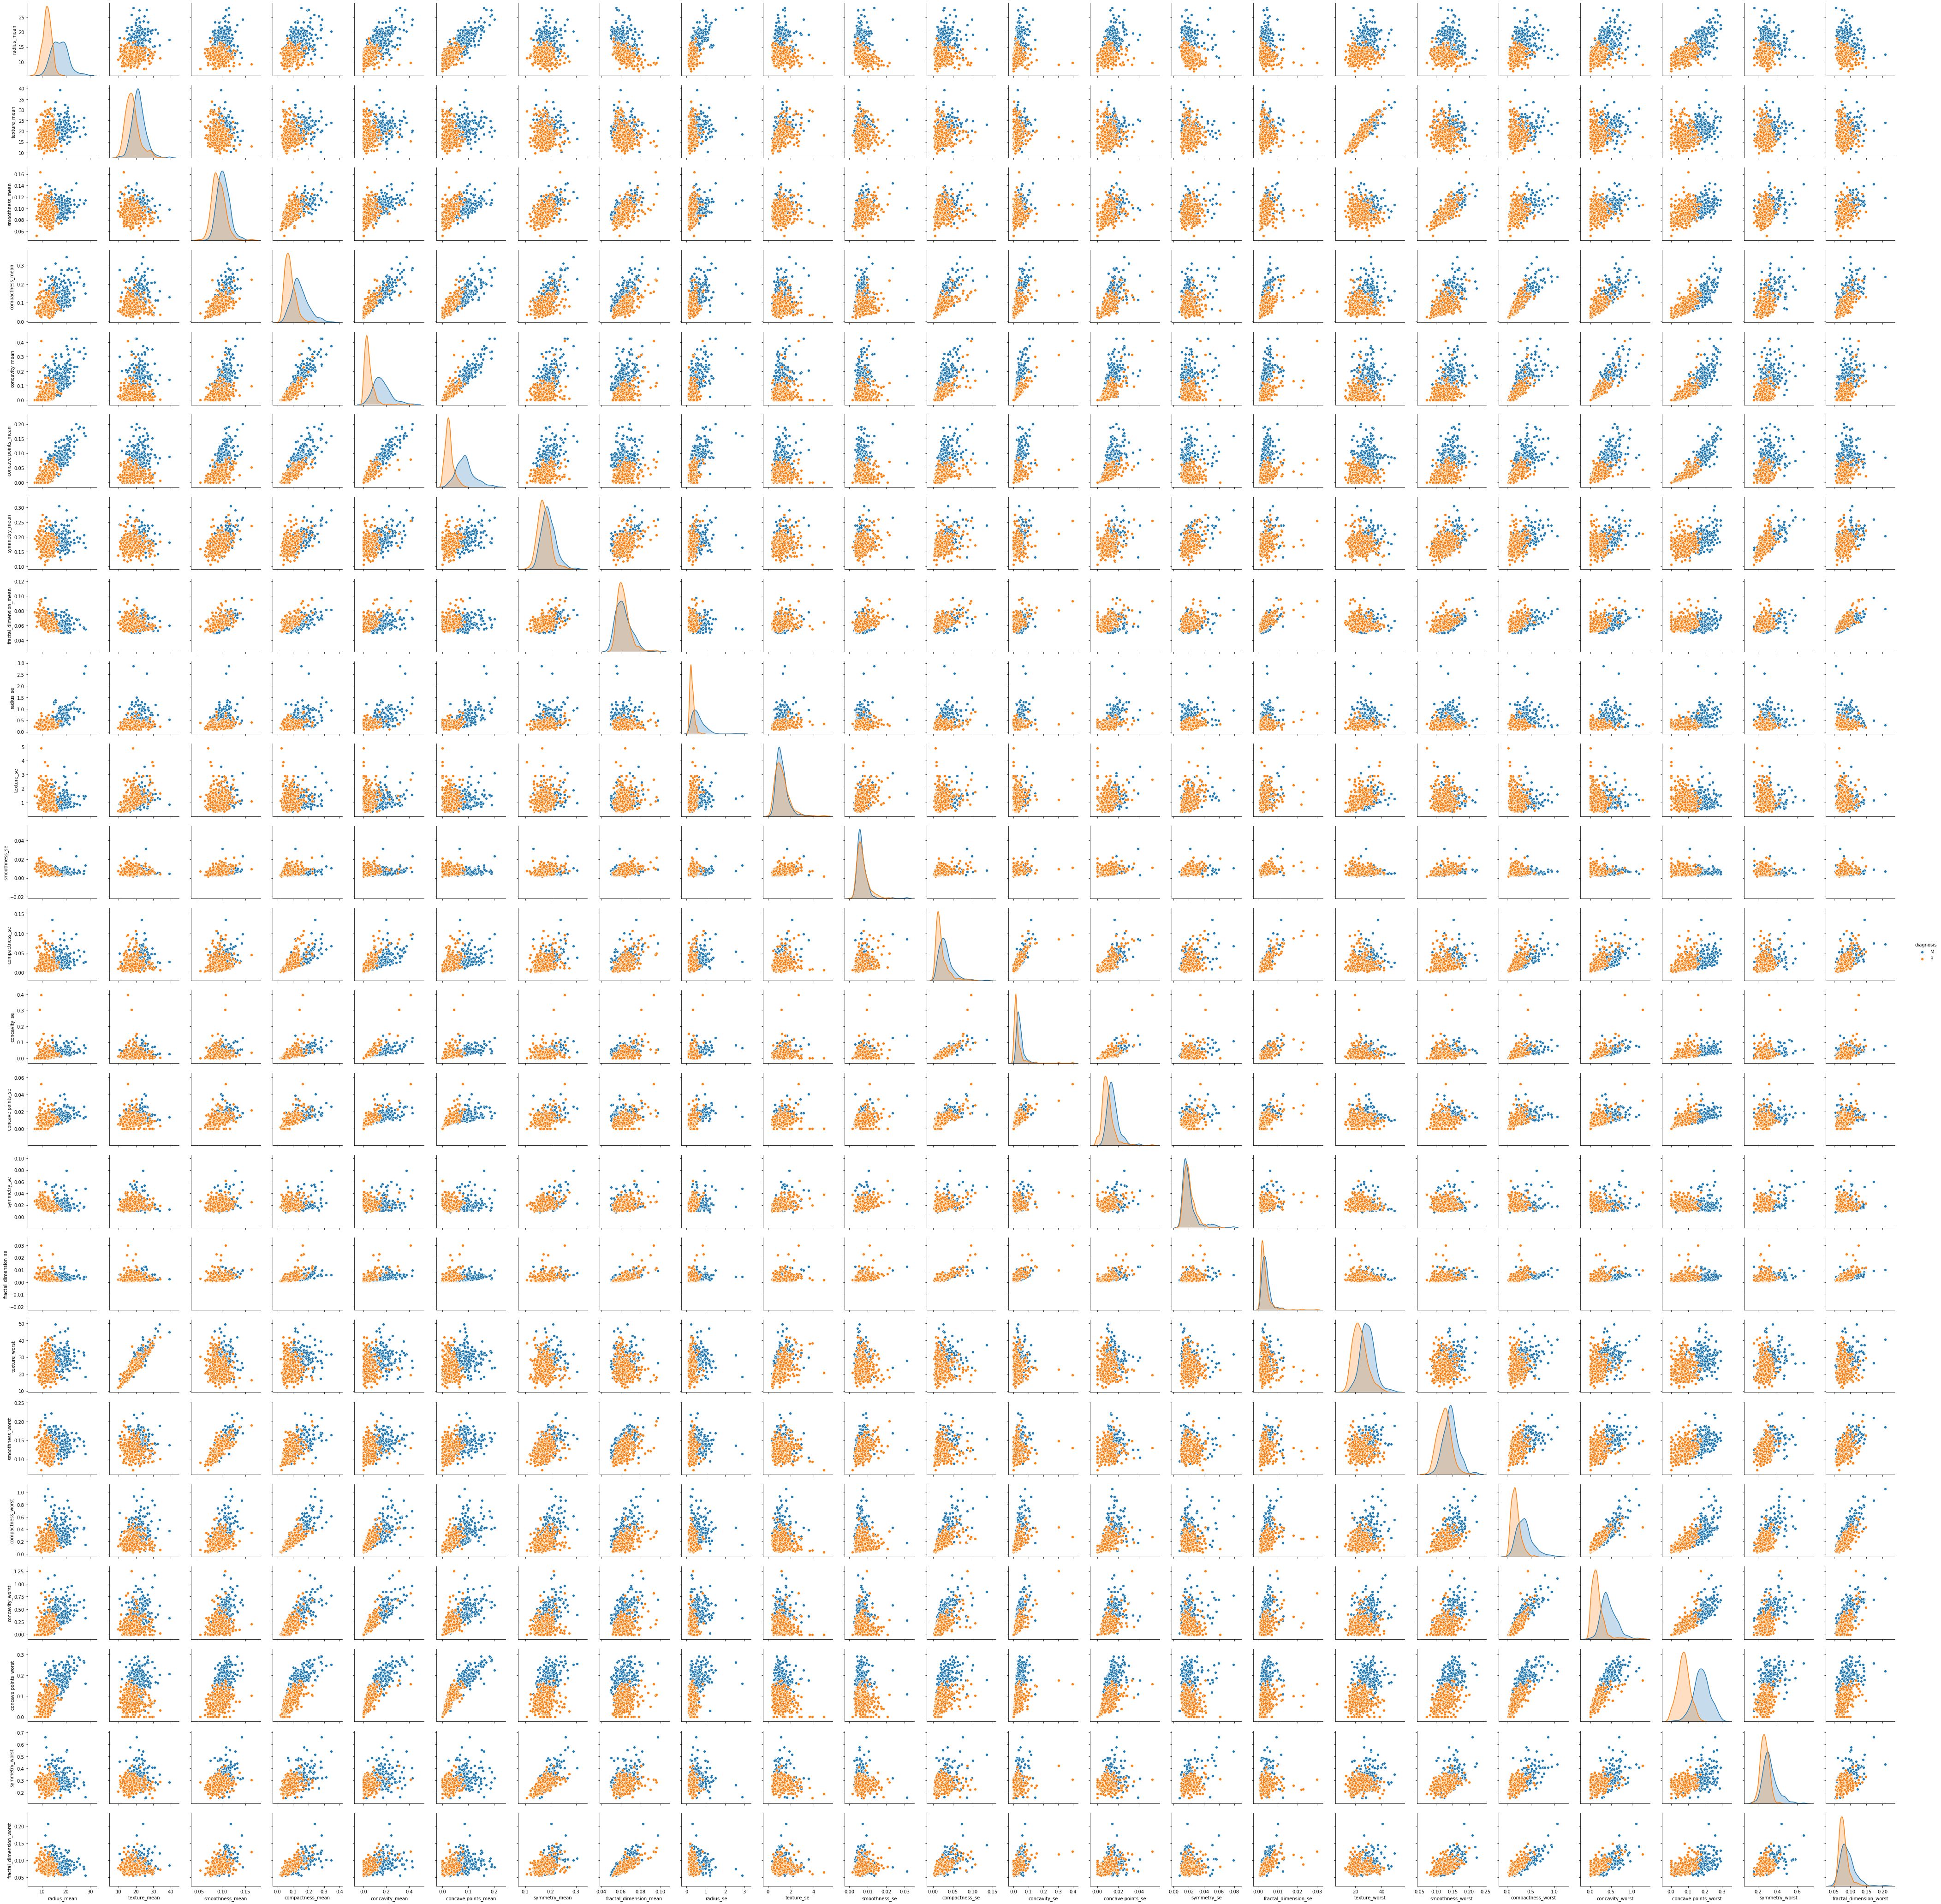

In [12]:
fig = sns.pairplot(data=data_breast, hue='diagnosis') # строим диаграммы с разделением по таргету
plt.show()

6) С помощью статистических методов проверить взаимосвязи между переменными.

для сравнения возьмем тот параметр, который визуально практически не отличается symmetry_se

In [13]:
from scipy import stats #  импортируем библиотеки

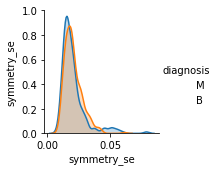

In [16]:
fig = sns.pairplot(data=data_breast[['symmetry_se','diagnosis']], hue='diagnosis') # строим диаграммы с разделением по таргету
plt.show()

In [17]:
stat_1 = data_breast[data_breast['diagnosis'] == 'B']['symmetry_se'].head(212)
stat_2= data_breast[data_breast['diagnosis'] == 'M']['symmetry_se'].head(212)
stats.ttest_ind(stat_1, stat_2)

Ttest_indResult(statistic=1.3012959419479302, pvalue=0.1938671761932825)

как и ожидалось, различий по этому параметру между ними нет(т.к. p-value больше 0.05). а теперь возьмем те которые визуально сильно отличаются , например radius_se

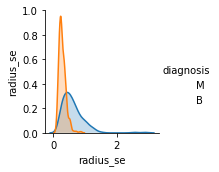

In [21]:
fig = sns.pairplot(data=data_breast[['radius_se','diagnosis']], hue='diagnosis') # строим диаграммы с разделением по таргету
plt.show()

In [22]:
stat_1 = data_breast[data_breast['diagnosis'] == 'B']['radius_mean'].head(212)
stat_2= data_breast[data_breast['diagnosis'] == 'M']['radius_mean'].head(212)
stats.ttest_ind(stat_1, stat_2)


Ttest_indResult(statistic=-21.50233047598313, pvalue=8.553148156865925e-70)

и тут нужно присматриваться очень  внимательно, к этой -70 на конце, которая нам говорит, что различия более чем статистически значимы. поэтому метод отбора фич напрашивается сам собой

7) Выбрать стратегию Feature Selection – сокращение размерности либо генерация новых переменных. Какой из этих двух подходов даст лучший результат при классификации?

я прогоню их все и и возьму с самым меньшим pvalue. Но разумеется я так же сравню, и генерацию новых фич и логистическую и линейную ригрессию. Будет интересно)

In [23]:
tru = {} # названия колонок, P-value которых ниже 0.5
all_tru = {} # названия всех числовых колонок
for i in data_breast.columns:
    try:
        stat_1 = data_breast[data_breast['diagnosis'] == 'B'][i].head(212)
        stat_2= data_breast[data_breast['diagnosis'] == 'M'][i].head(212)
        t = stats.ttest_ind(stat_1, stat_2)
        print(f'for parametrs {i}, p-value ={round(t[1],2)}')
        if t[1]>0.05:
            pass
        else:
            tru[i]=round(t[1],2)
        all_tru[i]=round(t[1],2)
    except:
        pass
pd.DataFrame([tru]).T[0].sort_values()

for parametrs radius_mean, p-value =0.0
for parametrs texture_mean, p-value =0.0
for parametrs smoothness_mean, p-value =0.0
for parametrs compactness_mean, p-value =0.0
for parametrs concavity_mean, p-value =0.0
for parametrs concave points_mean, p-value =0.0
for parametrs symmetry_mean, p-value =0.0
for parametrs fractal_dimension_mean, p-value =0.85
for parametrs radius_se, p-value =0.0
for parametrs texture_se, p-value =0.73
for parametrs smoothness_se, p-value =0.12
for parametrs compactness_se, p-value =0.0
for parametrs concavity_se, p-value =0.0
for parametrs concave points_se, p-value =0.0
for parametrs symmetry_se, p-value =0.19
for parametrs fractal_dimension_se, p-value =0.19
for parametrs texture_worst, p-value =0.0
for parametrs smoothness_worst, p-value =0.0
for parametrs compactness_worst, p-value =0.0
for parametrs concavity_worst, p-value =0.0
for parametrs concave points_worst, p-value =0.0
for parametrs symmetry_worst, p-value =0.0
for parametrs fractal_dimension_wo

compactness_mean           0.0
symmetry_worst             0.0
symmetry_mean              0.0
smoothness_worst           0.0
smoothness_mean            0.0
radius_se                  0.0
radius_mean                0.0
fractal_dimension_worst    0.0
concavity_worst            0.0
concavity_se               0.0
concavity_mean             0.0
concave points_worst       0.0
concave points_se          0.0
concave points_mean        0.0
compactness_worst          0.0
compactness_se             0.0
texture_mean               0.0
texture_worst              0.0
Name: 0, dtype: float64

теперь попробуем линейную и логистическую регрессию используя параметры которые мы отобрали

вообще их сначала нужно ещё и нормировать, но сначала попробуем без этого

In [24]:
# разделим наши данные на тестовые и тренировочные данные оставив только те данные где p-value нуже 0.05
data_breast['target'] = data_breast.apply(lambda x: 1 if (x['diagnosis'] == 'B') else 0, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[list(tru)], data_breast['target'], test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
def lin_reg(X_train, y_train, x_test, y_test): # функция которая помогает оценить качество обученной модели линейная регрессия
    lin_reg = LinearRegression().fit(X_train, y_train) # тренируем нашу модель
    R = lin_reg.score(X_train, y_train) # смотрим наш R^2
    y_pred = lin_reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    ans = f' R^2 = {R} mse = {mse}'
    return ans 
def log_reg(X_train, y_train, x_test, y_test): # функция которая помогает оценить качество обученной модели лог рергрессия
    log_reg = LogisticRegression().fit(X_train, y_train) # тренируем нашу модель
    R = log_reg.score(X_train, y_train) # смотрим наш R^2
    y_pred = log_reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    ans = f' R^2 = {R} mse = {mse}'
    return ans 

In [27]:
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.7485848641935908 mse = 0.0663091754395673
log_regression R^2 = 0.9340659340659341 mse = 0.05263157894736842


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
# а теперь проверим улучшится ли качество модели если не выкидывать лишние с моей точки зрения столбцы 
data_breast['target'] = data_breast.apply(lambda x: 1 if (x['diagnosis'] == 'B') else 0, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[list(all_tru)], data_breast['target'], test_size=0.2, random_state=42)
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.751234733152771 mse = 0.06719013119894593
log_regression R^2 = 0.9560439560439561 mse = 0.05263157894736842


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


качество нашей модели линейной регрессии ухудшилось, в то время как логистическая осталась та же

True

попробуем генерацию новых фич, возведем всё в логарифм

In [30]:
data_breast_t = data_breast

In [31]:
import math

In [32]:
for y in data_breast_t.columns:
    try:
        data_breast_t[f'log_{y}'] = data_breast_t[y].apply(lambda x: math.log(x, 2))
        data_breast_t[f'pow_{y}'] = data_breast_t[y].apply(lambda x: math.pow(x, 0.4))
    except:
        pass
    

In [33]:
data_breast_t.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'target', 'log_radius_mean', 'pow_radius_mean', 'log_texture_mean',
       'pow_texture_mean', 'log_smoothness_mean', 'pow_smoothness_mean',
       'log_compactness_mean', 'pow_compactness_mean', 'log_symmetry_mean',
       'pow_symmetry_mean', 'log_fractal_dimension_mean',
       'pow_fractal_dimension_mean', 'log_radius_se', 'pow_radius_se',
       'log_texture_se', 'pow_texture_se', 'log_smoothness_se',
       'pow_smoothness_se', 'log_compactness_se', 'pow_compactness_se',
       'log

In [34]:
# а теперь будем анализировать лишь логарифмированные столбцы
data_breast_t['target'] = data_breast.apply(lambda x: 1 if (x['diagnosis'] == 'B') else 0, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[['log_radius_mean', 'log_texture_mean', 'log_smoothness_mean',
       'log_compactness_mean', 'log_symmetry_mean',
       'log_fractal_dimension_mean', 'log_radius_se', 'log_texture_se',
       'log_smoothness_se', 'log_compactness_se', 'log_symmetry_se',
       'log_fractal_dimension_se', 'log_texture_worst', 'log_smoothness_worst',
       'log_compactness_worst', 'log_symmetry_worst',
       'log_fractal_dimension_worst']], data_breast['target'], test_size=0.2, random_state=42)
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.7333472092930597 mse = 0.0573114024134484
log_regression R^2 = 0.9516483516483516 mse = 0.05263157894736842


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


линейная регрессия явно приблизилась к логистической, а вот на логистическую это эффекта не произвело

In [36]:
# а теперь проверим если возвести их в степень 0.04
data_breast_t['target'] = data_breast.apply(lambda x: 1 if (x['diagnosis'] == 'B') else 0, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[['pow_radius_mean', 'pow_texture_mean',
       'pow_smoothness_mean', 'pow_compactness_mean', 'pow_symmetry_mean',
       'pow_fractal_dimension_mean', 'pow_radius_se', 'pow_texture_se',
       'pow_smoothness_se', 'pow_compactness_se', 'pow_symmetry_se',
       'pow_fractal_dimension_se', 'pow_texture_worst', 'pow_smoothness_worst',
       'pow_compactness_worst', 'pow_symmetry_worst',
       'pow_fractal_dimension_worst',
       'pow_radius_mean', 'pow_texture_mean', \
        'pow_texture_worst']], data_breast['target'], test_size=0.2, random_state=42)
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.7325205783477284 mse = 0.060972279095130526
log_regression R^2 = 0.9230769230769231 mse = 0.05263157894736842


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


линейная модель ухудшилась

In [39]:
# а теперь возьмём вообще всё
data_breast_t['target'] = data_breast.apply(lambda x: 1 if (x['diagnosis'] == 'B') else 0, axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'log_radius_mean', 'pow_radius_mean', 'log_texture_mean',
       'pow_texture_mean', 'log_smoothness_mean', 'pow_smoothness_mean',
       'log_compactness_mean', 'pow_compactness_mean', 'log_symmetry_mean',
       'pow_symmetry_mean', 'log_fractal_dimension_mean',
       'pow_fractal_dimension_mean', 'log_radius_se', 'pow_radius_se',
       'log_texture_se', 'pow_texture_se', 'log_smoothness_se',
       'pow_smoothness_se', 'log_compactness_se', 'pow_compactness_se',
       'log_symmetry_se', 'pow_symmetry_se', 'log_fractal_dimension_se',
       'pow_fractal_dimension_se', 'log_texture_worst', 'pow_texture_worst',
       'log_smoothness_worst', 'pow_smoothness_worst', 'log_compactness_worst',
       'pow_compactness_worst', 'log_symmetry_worst', 'pow_symmetry_worst',
       'log_fractal_dimension_worst', 'pow_fractal_dimension_worst']], data_breast['target'], test_size=0.2, random_state=42)
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.826105896280811 mse = 0.062145765841982246
log_regression R^2 = 0.9758241758241758 mse = 0.03508771929824561


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


линейная модель ухудшилась, а вот логистическая заметно скакнула вверх

теперь проверим что будет если нормировать данные

In [43]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

np_scaled = min_max_scaler.fit_transform(data_breast_t[['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst','target']])
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = ['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst','target']
df_norm.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0    52.103744      2.265810        59.375282         79.203730   
1    64.314449     27.257355        28.987993         18.176799   
2    60.149557     39.026040        51.430893         43.101650   
3    21.009040     36.083869        81.132075         81.136127   
4    62.989256     15.657761        43.035118         34.789277   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0       70.313964            73.111332      68.636364               60.551811   
1       20.360825            34.875746      37.979798               14.132266   
2       46.251172            63.568588      50.959596               21.124684   
3       56.560450            52.286282      77.626263              100.000000   
4       46.391753            51.838966      37.828283               18.681550   

   radius_se  texture_se  ...  symmetry_se  fractal_dimension_se  \
0  35.614702   12.046941  ...    31.164518             18.304244   
1  15.643672    8.258929  ...     8.453875              9.111010   
2  22.962158    9.430251  ...    20.569032             12.700551   
3  13.909107   17.587518  ...    72.814769             28.720479   
4  23.382220    9.306489  ...    13.617943             14.579965   

   texture_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      14.152452         60.113584          61.929156        56.861022   
1      30.357143         34.755332          15.456336        19.297125   
2      36.007463         48.358978          38.537513        35.974441   
3      38.592751         91.547250          81.401170        54.864217   
4      12.393390         43.736380          17.241513        31.948882   

   concave points_worst  symmetry_worst  fractal_dimension_worst  target  
0             91.202749       59.846245                41.886396     0.0  
1             63.917526       23.358959                22.287813     0.0  
2             83.505155       40.370589                21.343303     0.0  
3             88.487973      100.000000                77.371114     0.0  
4             55.841924       15.750049                14.259478     0.0  

[5 rows x 24 columns]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =\
train_test_split(data_breast[['radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']], data_breast['target'], test_size=0.2, random_state=42)
print(f'lin_regression{lin_reg(X_train, y_train, X_test, y_test)}') #  линейная регрессия
print(f'log_regression{log_reg(X_train, y_train, X_test, y_test)}') #  логистическая регрессия

lin_regression R^2 = 0.751234733152771 mse = 0.06719013119894593
log_regression R^2 = 0.9560439560439561 mse = 0.05263157894736842


c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


нет, нормализация данных в данном случае не помогла

в итоге самый оптимальный подход, это логистическая регрессия паралельно с генерацией новых фич